In [54]:
import pandas as pd
import numpy as np

In [55]:
df =pd.read_csv("Iris.csv")

In [56]:
df.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [58]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [59]:
df.duplicated().sum()

0

In [60]:
df.drop(columns = ['Id'],inplace =True)

In [61]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [62]:
df['Species'].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

## Overall Data is Clean We don't need to perform Feature Engineering or any other method

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns

## EDA

<Axes: >

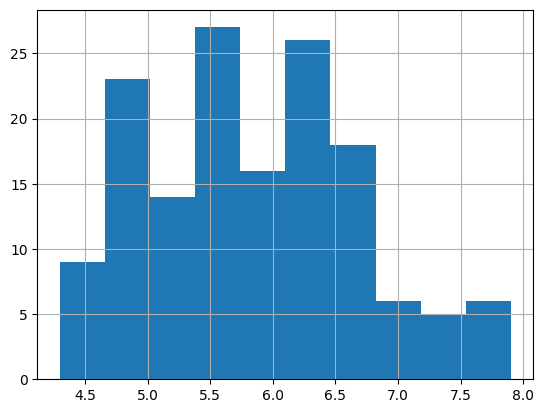

In [64]:
df['SepalLengthCm'].hist()

<Axes: >

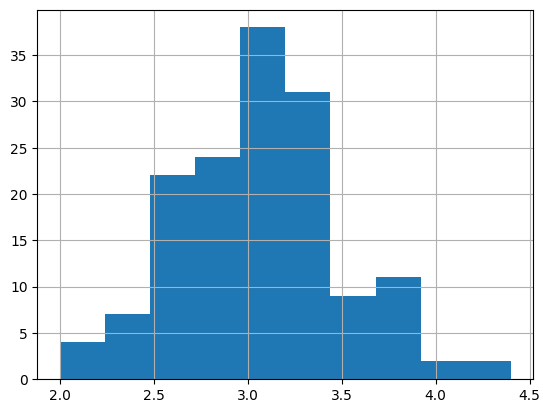

In [65]:
df['SepalWidthCm'].hist()

<Axes: >

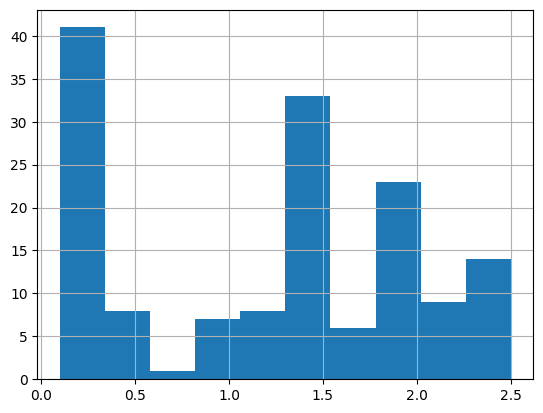

In [66]:
df['PetalWidthCm'].hist()

In [67]:
colors=['red','orange','blue']
species=['Iris-virginica','Iris-versicolor','Iris-setosa']

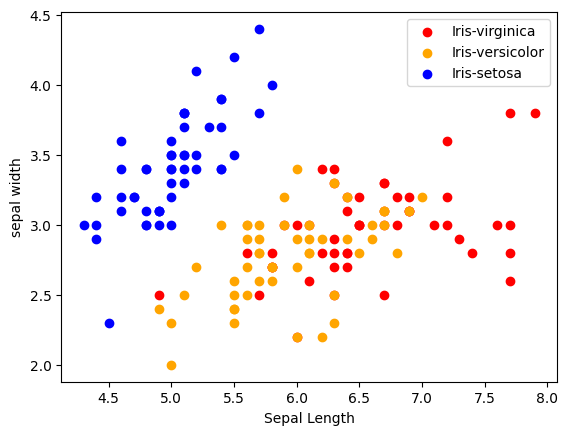

In [68]:
for i in range(3):
    x=df[df['Species']==species[i]]
    plt.scatter(x['SepalLengthCm'],x['SepalWidthCm'],c= colors[i],label=species[i])
    
plt.xlabel("Sepal Length")
plt.ylabel("sepal width")
plt.legend()

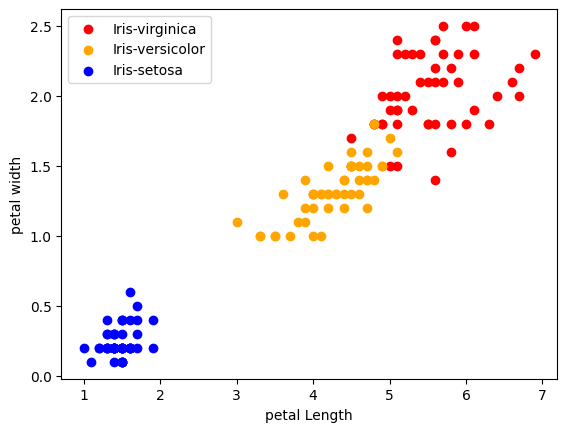

In [69]:
for i in range(3):
    x=df[df['Species']==species[i]]
    plt.scatter(x['PetalLengthCm'],x['PetalWidthCm'],c= colors[i],label=species[i])
    
plt.xlabel("petal Length")
plt.ylabel("petal width")
plt.legend()

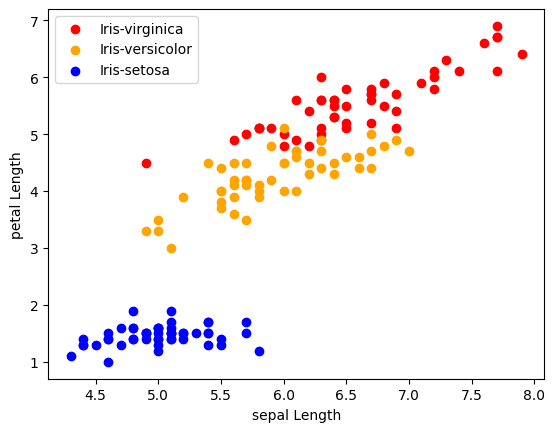

In [70]:
for i in range(3):
    x=df[df['Species']==species[i]]
    plt.scatter(x['SepalLengthCm'],x['PetalLengthCm'],c= colors[i],label=species[i])
    
plt.xlabel("sepal Length")
plt.ylabel("petal Length")
plt.legend()

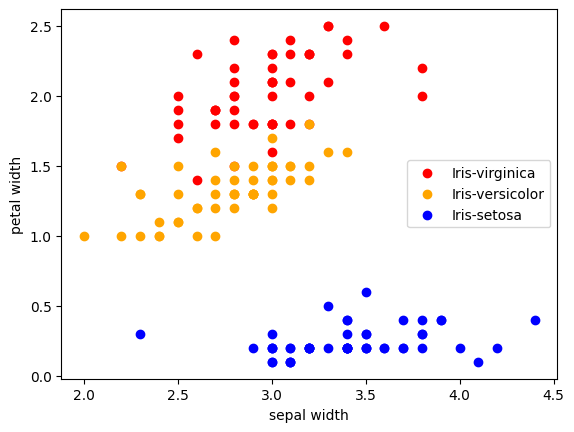

In [71]:
for i in range(3):
    x=df[df['Species']==species[i]]
    plt.scatter(x['SepalWidthCm'],x['PetalWidthCm'],c= colors[i],label=species[i])
    
plt.xlabel("sepal width")
plt.ylabel("petal width")
plt.legend()

In [72]:
corr=df.corr(numeric_only=True)

<Axes: >

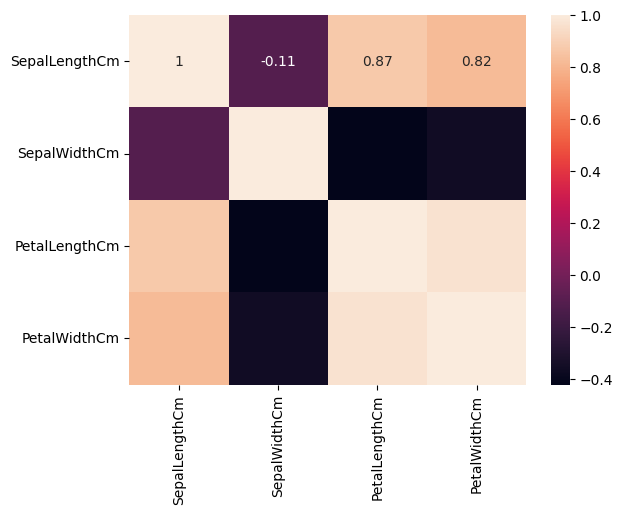

In [73]:
sns.heatmap(corr,annot=True)

## Machine Learning Part

In [89]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [90]:
df['Species']=le.fit_transform(df['Species'])
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [91]:
from sklearn.model_selection import train_test_split
# train=70
#test=30
X=df.drop(columns=['Species'])
Y=df['Species']
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.30,random_state = 42)

In [92]:
X

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [93]:
Y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species, Length: 150, dtype: int64

## LogisticRegression

In [94]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_train,y_train)
print("Accuracy:",model.score(x_test,y_test)*100)

Accuracy: 100.0


## KNeighborsClassifier

In [95]:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier()
model.fit(x_train,y_train)
print("Accuracy:",model.score(x_test,y_test)*100)

Accuracy: 100.0


## DecisionTreeClassifier

In [96]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()
model.fit(x_train,y_train)
print("Accuracy:",model.score(x_test,y_test)*100)

Accuracy: 100.0
